## **Aufgabe 3 - Fluchtgeschwindigkeit**

Die Bewegung einer (antriebslosen) Rakete außerhalb der Erdatmosphäre ist durch das Gravitationsgesetz bestimmt. Vernachlässigt man den Einfluss anderer Himmelskörper, und nimmt man eine geradlinige, eindimensionale Bewegung an, so gilt für den Abstand Erde–Rakete $r(t)$ die Differentialgleichung:

$$ \ddot{r}(t) = -\gamma \, m_E \cdot \dfrac{1}{r^2} $$

mit den Anfangsbedingungen

$$ r(0) = r_0~,$$
$$ \dot{r}(0) = v_0 $$

und der Gravitationskonstante $\gamma = 6{,}67 \cdot 10^{-11}\,\text{N\,m}^2\text{\,kg}^{-2}$, der Masse der Erde $m_E = 5{,}59 \cdot 10^{24}\,\text{kg}$, dem mittleren Radius der Erde $r_0 = 6{,}36 \cdot 10^6 \,\text{m}$ und der Startgeschwindigkeit der Rakete $v_0$.

### **Teilaufgaben**

  1. Diskretisieren Sie die Differentialgleichung unter Verwendung des zentralen Differenzenschemas für die Zeit (2. Ordnung). Stellen Sie die diskretisierte Gleichung im Jupyter Notebook dar.
  2. Berechnen Sie die Distanz Erde-Rakete als Funktion der Zeit und stellen Sie diese in einem Diagramm dar, wenn die Raekte eine Startgeschwindigkeit von $v_0 = 9\,\text{km/s}$ hat. Nutzen Sie zur Diskretisierung eine Zeitschrittweite von $\Delta t = 1\,\text{s}$ und simulieren Sie bis zu einer Maximalzeit von 168 h (1 Woche). Kann die Rakete das Gravitationsfeld der Erde verlassen? **Hinweis:** Nutzen Sie für die Berechnung des ersten Zeitschritts die gegebenen Anfangsbedingungen für die Geschwindigkeit. Anschließend können Sie für die weiteren Zeitschritte die diskretisierte Differentialgleichung lösen.
  3. Erweitern Sie ihr Programm, damit es schrittweise die Startgeschwindigkeit $v_0$ in Schritten von $0{,}1\,\text{km/s}$ erhöht, bis es zu keinem Absturz mehr kommt. Ab welcher Startgeschwindigkeit kann die Rakete das Gravitationsfeld der Erde verlassen? Vergleichen Sie diese Geschwindigkeit mit der exakten [Fluchtgeschwindigkeit](https://de.wikipedia.org/wiki/Fluchtgeschwindigkeit_(Raumfahrt)). Welche Ursachen könnte die Abweichen haben?

## =================================================================================

## Vollständiger Code

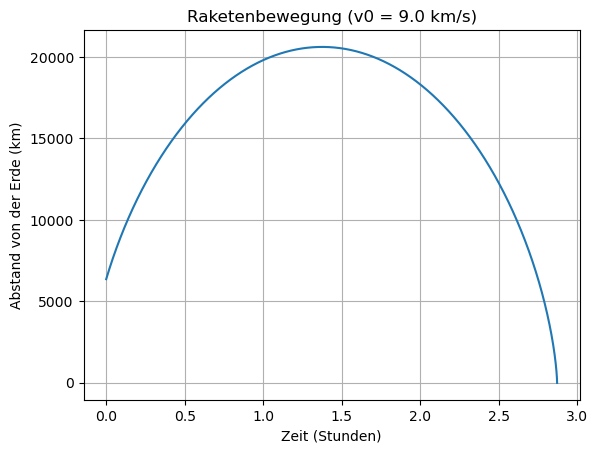

Maximale Entfernung von der Erdöberflache: 20618.73 km
Die Rakete konnte das Gravitationsfeld der Erde mit v0 = 9.00 km/s nicht verlassen.
Die Rakete verlässt das Gravitationsfeld der Erde ab einer Startgeschwindigkeit von 10.80 km/s
Theoretische Fluchtgeschwindigkeit: 10.83 km/s
Die Relative Abweichung 0.26% ist gering und kann durch die Numerische Diskretisierung und die Schrittweise Δt = 1s erklärt werden.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanten
gamma = 6.67e-11       # Gravitationskonstante in N·m²·kg⁻²
m_E = 5.59e24          # Masse der Erde in kg
r_0 = 6.36e6           # Erdradius in m
delta_t = 1            # Zeitschrittweite in Sekunden
t_gesamt = 168 * 3600  # Gesamtsimulationszeit in Sekunden (1 Woche)

def simulate_rocket(v_0, t_gesamt, delta_t):
    # Teilaufgabe 1: Diskretisierung der Differentialgleichung
    # Hier wird die Bewegungsgleichung der Rakete mittels zentrierter Differenzen (2. Ordnung) diskretisiert.
    n_steps = int(t_gesamt / delta_t)  # Anzahl der Zeitschritte
    r = np.zeros(n_steps)             # Array für die Entfernungen initialisieren
    r[0] = r_0                        # Startentfernung: Radius der Erde
    r[1] = r_0 + v_0 * delta_t        # Entfernung nach dem ersten Zeitschritt

    for t in range(1, n_steps - 1):
        if r[t] <= 0:  # Absturzbedingung
            return r[:t + 1], False  # Rückgabe: Bewegung bis zum Absturz, Rakete entkommt nicht
        # Zentrale Differenzengleichung zur Berechnung der nächsten Position
        r[t + 1] = - (gamma * m_E * delta_t**2) / (r[t]**2) + 2 * r[t] - r[t - 1]
    return r, True  # Rückgabe, wenn die Rakete das Gravitationsfeld verlassen hat

# Teil 2: Simulation mit v_0 = 9 km/s
# Teilaufgabe 2: Simulation der Raketenbewegung mit einer gegebenen Startgeschwindigkeit

v_0 = 9e3  # Startgeschwindigkeit in m/s
r, entkommen = simulate_rocket(v_0, t_gesamt, delta_t)

# Visualisierung der Ergebnisse für Teil 2
zeit = np.linspace(0, len(r) * delta_t, len(r))  # Zeitachse in Sekunden
plt.plot(zeit / 3600, r / 1e3)                   # Entfernung gegen Zeit (Stunden und Kilometer)
plt.xlabel("Zeit (Stunden)")
plt.ylabel("Abstand von der Erde (km)")
plt.title(f"Raketenbewegung (v0 = {v_0 / 1e3:.1f} km/s)")
plt.grid()
plt.show()

# Maximale Entfernung berechnen und ausgeben
max_dist = np.max(r)
print(f"Maximale Entfernung von der Erdöberflache: {max_dist / 1e3:.2f} km")

# Ergebnis für Teil 2
if entkommen:
    print(f"Die Rakete hat das Gravitationsfeld der Erde mit v0 = {v_0 / 1e3:.2f} km/s verlassen.")
else:
    print(f"Die Rakete konnte das Gravitationsfeld der Erde mit v0 = {v_0 / 1e3:.2f} km/s nicht verlassen.")

# Teilaufgabe 3: Bestimmung der minimalen Fluchtgeschwindigkeit
# Iterative Suche nach der Geschwindigkeit, bei der die Rakete das Gravitationsfeld verlässt

v_step = 0.1e3  # Schrittweite in m/s

while True:
    r, entkommen = simulate_rocket(v_0, t_gesamt, delta_t)
    if entkommen:
        break  # Beenden der Suche, wenn die Rakete entkommt
    v_0 += v_step  # Erhöhen der Startgeschwindigkeit

# Berechnete Fluchtgeschwindigkeit
print(f"Die Rakete verlässt das Gravitationsfeld der Erde ab einer Startgeschwindigkeit von {v_0 / 1e3:.2f} km/s")

# Berechnete Theoretische Fluchtgeschwindigkeit
# Physikalische Berechnung basierend auf der Gravitationskraft
v_escape_theoretical = np.sqrt(2 * gamma * m_E / r_0)
print(f"Theoretische Fluchtgeschwindigkeit: {v_escape_theoretical / 1e3:.2f} km/s")

# Vergleich: Berechnung der Abweichung
# Teilaufgabe 3: Analyse der Abweichung zwischen berechneter und theoretischer Fluchtgeschwindigkeit
deviation = abs(v_0 - v_escape_theoretical) / v_escape_theoretical * 100
print(f"Die Relative Abweichung {deviation:.2f}% ist gering und kann durch die Numerische Diskretisierung und die Schrittweise Δt = 1s erklärt werden.")


## Trennung und schrittweise Erläuterung des Codes.

### 1. Importieren von Python-Bibliotheken und Festlegen von Konstanten.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Konstanten
gamma = 6.67e-11  # Gravitationskonstante in N·m²·kg⁻²
m_E = 5.59e24     # Masse der Erde in kg
r_0 = 6.36e6      # Erdradius in m
delta_t = 1            # Zeitschrittweite in Sekunden
t_gesamt = 168 * 3600  # Gesamtsimulationszeit in Sekunden (1 Woche)

+ `import numpy as np`: für numerische Berechnungen und die Arbeit mit arrays.
+ `import matplotlib.pyplot as plt`: Tool zur Datenvisualisierung (Diagramme und Plots).
+ Danach sind die # Konstanten (pysikalische Werte) und Parameter für die Berechnung: Gravitationskonstante, Masse der Erde, Erdradius und die Aufgabebezogene Zeitschritte und Simulationszeit.

### 2. Implementierung der Simulation mit der Funktion `simulate_rocket`: (Teilaufgabe 1 & 2)

In [3]:
def simulate_rocket(v_0, t_gesamt, delta_t):
    # Teilaufgabe 1: Diskretisierung der Differentialgleichung
    # Hier wird die Bewegungsgleichung der Rakete mittels zentrierter Differenzen (2. Ordnung) diskretisiert.
    n_steps = int(t_gesamt / delta_t)  # Anzahl der Zeitschritte
    r = np.zeros(n_steps)             # Array für die Entfernungen initialisieren
    r[0] = r_0                        # Startentfernung: Radius der Erde
    r[1] = r_0 + v_0 * delta_t        # Entfernung nach dem ersten Zeitschritt

    for t in range(1, n_steps - 1):
        if r[t] <= 0:  # Absturzbedingung
            return r[:t + 1], False  # Rückgabe: Bewegung bis zum Absturz, Rakete entkommt nicht
        # Zentrale Differenzengleichung zur Berechnung der nächsten Position
        r[t + 1] = - (gamma * m_E * delta_t**2) / (r[t]**2) + 2 * r[t] - r[t - 1]
    return r, True  # Rückgabe, wenn die Rakete das Gravitationsfeld verlassen hat

# Teil 2: Simulation mit v_0 = 9 km/s
# Teilaufgabe 2: Simulation der Raketenbewegung mit einer gegebenen Startgeschwindigkeit
v_0 = 9e3  # Startgeschwindigkeit in m/s
r, entkommen = simulate_rocket(v_0, t_gesamt, delta_t)

+ Für **Teilaufgabe 1** wird die Diskretisierung der Differentialgleichung im Folgenden erläutert:

$$
r[t + 1] = - \frac{\gamma \cdot m_E \cdot \Delta t^2}{r[t]^2} + 2 \cdot r[t] - r[t - 1]
$$

+ Term 1: Beschreibt die Gravitationskraft.
$$
- \frac{\gamma \cdot m_E \cdot \Delta t^2}{r[t]^2}
$$


+ Term 2: Aktuelle Position.
$$
+ 2 \cdot r[t]
$$


+ Term 3: Vorherige Position.
$$
- r[t - 1]
$$

+ Die **Teilaufgabe 2** zeigt die Simulation der Raketenbewegung mit einer Gesschwindigkeit von 9 m/s.

Ausgabe:
+ `r (numpy array)`: Array mit den berechneten Abständen der Rakete von der Erde zu jedem Zeitschritt.
+ `entkommen (bool)`: Gibt an, ob die Rakete das Gravitationsfeld verlassen hat (True) oder abgestürzt ist (False). --> nächste Abschnitte unten

### 3. Visualisierung der Raketenbewegung in Abhängigkeit von der Zeit

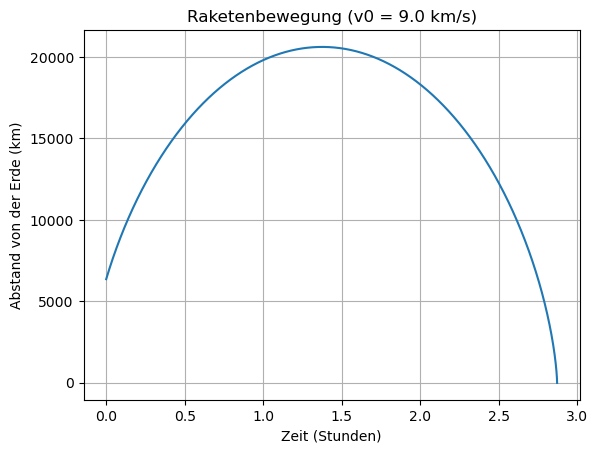

In [4]:
# Plot für Teil 2
zeit = np.linspace(0, len(r) * delta_t, len(r))
plt.plot(zeit / 3600, r / 1e3)
plt.xlabel("Zeit (Stunden)")
plt.ylabel("Abstand von der Erde (km)")
plt.title(f"Raketenbewegung (v0 = {v_0 / 1e3:.1f} km/s)")
plt.grid()
plt.show()

+ `zeit = np.linspace(start, stop, num):` Erstellt eine gleichmäßig verteilte Sequenz von Werten zwischen `start` und `stop`.

Parameter:
+ `start = 0`: Beginn der Zeitachse (Zeit t=0).
+ `stop = len(r) * delta_t`: Endzeit basierend auf der Anzahl der Zeitschritte (len(r)) multipliziert mit der Schrittweite Δt.
+ `num = len(r)`: Die Anzahl der Werte in der Zeitachse entspricht der Anzahl der gespeicherten Positionen im Array r.

Ausgabe:
+ Hier sind die Achsen angepasst. Die Zeit `zeit / 3600` ist in Stunden umgerechnet. Die Entfernung `r / 1e3` wird von Meter in Kilometer umgerechnet.

Nachfolgend sind die Codezeilen aufgeführt, die das Skalendiagramm, die Beschriftungen und den Titel erzeugen ( die sogenannten `plt` Codezeilen).

### 4. Berechnung der maximalen Entfernung der Rakete von der Erdoberfläche (Extra Info!!)

In [5]:
max_dist = np.max(r)
print(f"Maximale Entfernung von der Erdöberflache: {max_dist / 1e3:.2f} km")

Maximale Entfernung von der Erdöberflache: 20618.73 km


+ `np.max(r)`: Findet die maximale Entfernung im Array `r`. Dies entspricht der größten Distanz, die die Rakete von der Erde erreicht hat.

Ausgabe:
+ Konvertiert die maximale Entfernung in Kilometer (1 km = 1000 m). Gibt die maximale Entfernung mit zwei Nachkommastellen aus.

### 5. Ergebnis der Raketenbewegung

In [6]:
# Ergebnis für Teil 2
if entkommen:
    print(f"Die Rakete hat das Gravitationsfeld der Erde mit v0 = {v_0 / 1e3:.2f} km/s verlassen.")
else:
    print(f"Die Rakete konnte das Gravitationsfeld der Erde mit v0 = {v_0 / 1e3:.2f} km/s nicht verlassen.")

Die Rakete konnte das Gravitationsfeld der Erde mit v0 = 9.00 km/s nicht verlassen.


#### Wichtig!:

`if entkommen:`: Überprüft, ob die Rakete das Gravitationsfeld verlassen hat (`entkommen = True`).

### 6. Start der Iterative Suche nach der minimalen Fluchtgeschwindigkeit (While Schleife): Teilaufgabe 3

In [7]:
# Teil 3: Bestimmung der Fluchtgeschwindigkeit
v_step = 0.1e3  # Schrittweite in m/s

while True:
    r, entkommen = simulate_rocket(v_0, t_gesamt, delta_t)
    if entkommen:
        break
    v_0 += v_step

+ `v_step = 0.1e3`: 100 m/s. Die Geschwindigkeit wird bei jeder Iteration 100 m/s erhöht bis die Rakete das Gravitationsfeld verlässt.

+ `v_0 = 9e3`: 9000 m/s. Ausgangswert für die iterative Suche nach der Fluchtgeschwindigkeit (Schon oben angegeben)

+ `while True`: Endlosschleife die so lange läuft, bis die Rakete das Gravitationsfeld verlässt .

+ `simulate_rocket`: Die Funktion `simulate_rocket` führt die Simulation mit der aktuellen Startgeschwindigkeit (v0) durch.

Ausgabe:
+ `r`: Ein Array mit den Entfernungen der Rakete zu jedem Zeitschritt.
+ `entkommen`: Ein boolescher Wert, der angibt, ob die Rakete das Gravitationsfeld verlassen hat:`True`(Rakete entkommt) oder `False` (Rakete stürzt zurück zur Erde).

+ Bedingung zur Beenden der Schleife:
    + Wenn die Funktion `simulate_rocket` zurückgibt, dass die Rakete entkommen ist (`entkommen=True`), wird die Schleife mit `break` beendet.
    + Zu diesem Zeitpunkt hat die Rakete die minimale Fluchtgeschwindigkeit erreicht.

+ Erhöhung der Startgeschwindigkeit, wenn die Rakete nicht entkommt 
    + Die Startgeschwindigkeit (v0) wird um `v_step` (100m/s) erhöht wenn (`entkommen=False`)
    + Die Schleife wiederholt die Simulation mit der neuen Geschwindigkeit.

### 7. Ergebnisse der Fluchtgeschwindigkeitsberechnung und Vergleich mit der Theorie

In [8]:
# Berechnete Fluchtgeschwindigkeit
print(f"Die Rakete verlässt das Gravitationsfeld der Erde ab einer Startgeschwindigkeit von {v_0 / 1e3:.2f} km/s")

# Berechnete Theoretische Fluchtgeschwindigkeit
# Physikalische Berechnung basierend auf der Gravitationskraft
v_escape_theoretical = np.sqrt(2 * gamma * m_E / r_0)
print(f"Theoretische Fluchtgeschwindigkeit: {v_escape_theoretical / 1e3:.2f} km/s")

# Vergleich: Berechnung der Abweichung
# Teilaufgabe 3: Analyse der Abweichung zwischen berechneter und theoretischer Fluchtgeschwindigkeit
deviation = abs(v_0 - v_escape_theoretical) / v_escape_theoretical * 100
print(f"Die Relative Abweichung {deviation:.2f}% ist gering und kann durch die Numerische Diskretisierung und die Schrittweise Δt = 1s erklärt werden.")

Die Rakete verlässt das Gravitationsfeld der Erde ab einer Startgeschwindigkeit von 10.80 km/s
Theoretische Fluchtgeschwindigkeit: 10.83 km/s
Die Relative Abweichung 0.26% ist gering und kann durch die Numerische Diskretisierung und die Schrittweise Δt = 1s erklärt werden.


Berechnete Fluchtgeschwindigkeit
+ `v_0 / 1e3`: ist die in der Schleife berechnete minimale Fluchtgeschwindigkeit in Metern pro Sekunde. Durch Division durch 1000 wird in Kilometer pro Sekunde (km/s) umgerechnet. Die berechnete minimale Fluchtgeschwindigkeit wird mit zwei Nachkommastellen ausgegeben.

Theoretische Fluchtgeschwindigkeit berechnen
+ Für das hier gibt es eine Formel hier https://de.wikipedia.org/wiki/Fluchtgeschwindigkeit_(Raumfahrt). Die theoretische Fluchtgeschwindigkeit wird mithilfe der Quadratwurzel-Funktion `np.sqrt()` berechnet. Diese Geschwindigkeit repräsentiert den Mindestwert, den ein Objekt benötigt, um das Gravitationsfeld der Erde zu verlassen, ohne zusätzliche Schubkraft. `v_escape_theoretical / 1e3`: Die theoretische Geschwindigkeit wird in Kilometer pro Sekunde (km/s) umgerechnet.

Abweichung zwischen berechneter und theoretischer Fluchtgeschwindigkeit
+ Hier wird die Die relative Abweichung zwischen der berechneten (`v0`) und der theoretischen Fluchtgeschwindigkeit (`v_escape_theoretical`) berechnet. Der Unterschied wird relativ zur theoretischen Geschwindigkeit gesetzt. Ergebnis wird in Prozent umgewandelt. Das ist alles!
​
